Лабораторная работа № 10: **Dim reduce** <br>
Выполнил: **Стадников Александр, гр.6135**

In [2]:
import pandas as pd
from dask import delayed
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

---
---
## 0. Найти датасет
> `(желательно датасет для многоклассовой классификации, нагляднее для дальнейшей визуализации, либо дадасет из предыдущей работы с результатами кластеризации) с большим количеством вещественных признаков (от 20-ти шт.)`

## Описание данных

**Исходные данные:** https://www.kaggle.com/iabhishekofficial/mobile-price-classification?select=test.csv <br><br>
**Набор данных: "Классификация мобильных телефонов по цене"**<br>

In [5]:
df = pd.read_csv('data_dim_reduce/train.csv')
df.info()
df.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1137,1,1.0,0,18,0,7,1.0,196,3,...,942,1179,3616,13,5,12,1,1,1,3
96,1355,0,2.3,0,10,1,23,0.2,132,5,...,651,891,880,19,4,8,1,1,0,0
97,1665,1,0.5,0,3,1,60,0.2,194,6,...,1572,1684,1601,18,17,14,1,0,0,2
98,657,0,2.5,0,0,0,37,0.7,141,2,...,476,961,1412,14,3,18,0,1,0,0


In [6]:
temp = df.drop(columns=['price_range'])

## 1. Произвести визуализацию точек из исходного признакового пространства в 2-мерном пространстве, используя алгоритм t-SNE (sklearn.manifold.TSNE). Цвет точек пусть отражает метки классов (или номера кластеров из предыдущей работы).

In [7]:
%%time
tsne = TSNE(n_components=2, n_iter=300, n_jobs=-1)
tsne_data = tsne.fit_transform(temp)

Wall time: 6.14 s


<AxesSubplot:title={'center':'TSNE'}>

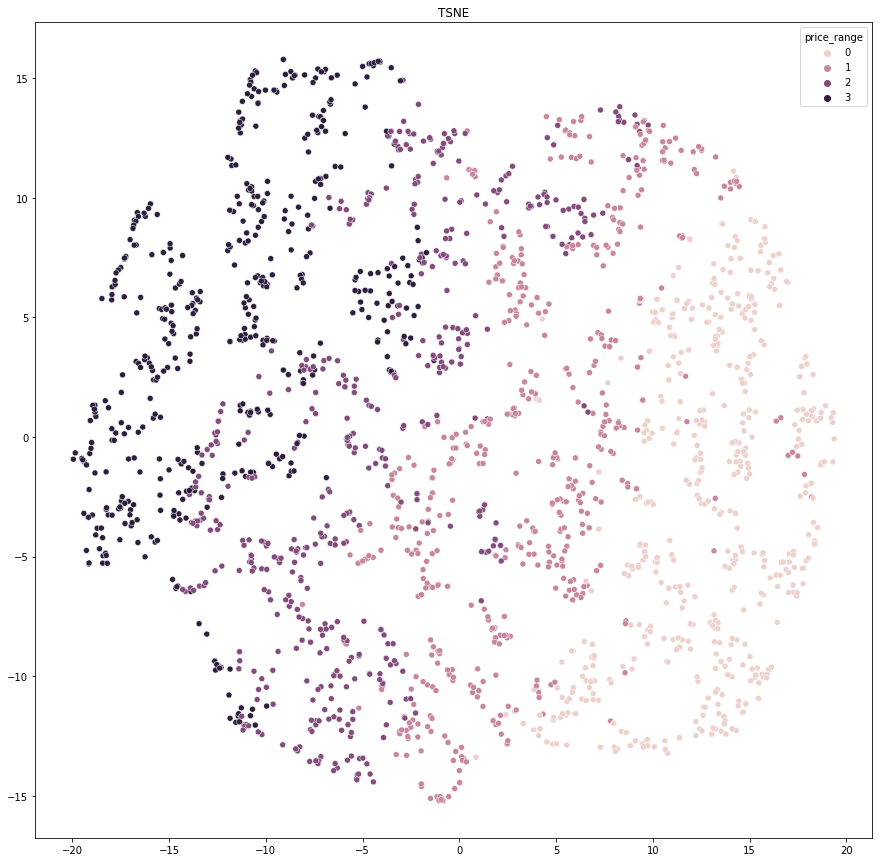

In [11]:
plt.figure(figsize=(15,15))
plt.title("TSNE")
sns.scatterplot(x=tsne_data[:,0],y=tsne_data[:,1],hue=df['price_range'])

## 2. Произвести визуализацию точек из исходного признакового пространства в 2-мерном пространстве, используя метод главных компонент (sklearn.decomposition.PCA) или Truncated SVD (sklearn.decomposition.TruncatedSVD). Цвет точек пусть отражает метки классов (или номера кластеров из предыдущей работы).

In [12]:
%%time
pca = PCA(n_components=2)
pca_data = pca.fit_transform(temp)

Wall time: 32 ms


<AxesSubplot:title={'center':'PCA'}>

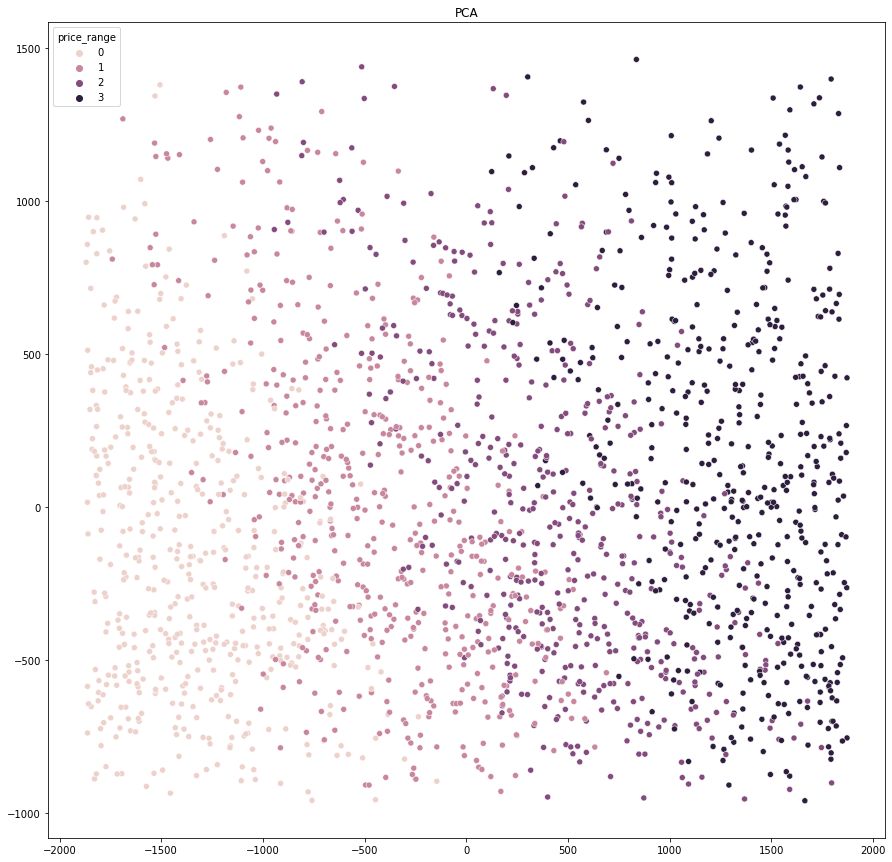

In [13]:
plt.figure(figsize=(15,15))
plt.title("PCA")
sns.scatterplot(x=pca_data[:,0],y=pca_data[:,1],hue=df['price_range'])

In [14]:
%%time
tsvd = TruncatedSVD(n_components=2,n_iter=1000)
tsvd_data = tsvd.fit_transform(temp)

Wall time: 972 ms


<AxesSubplot:title={'center':'TruncatedSVD'}>

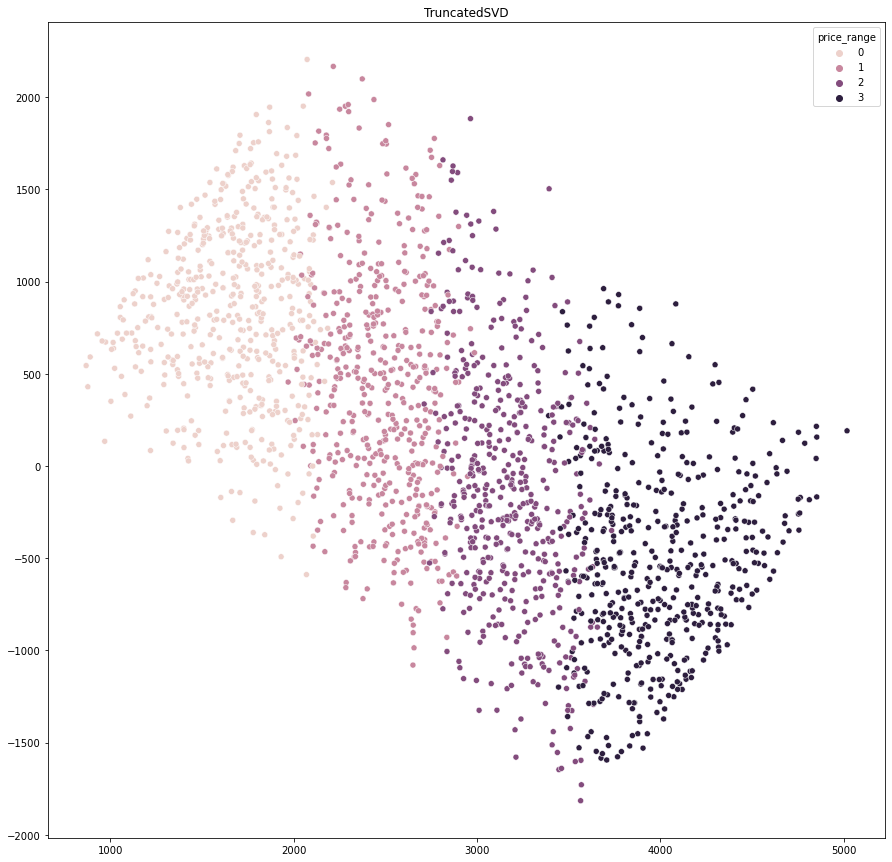

In [18]:
plt.figure(figsize=(15,15))
plt.title("TruncatedSVD")
sns.scatterplot(x=tsvd_data[:,0],y=tsvd_data[:,1],hue=df['price_range'])

## 3. На практике, как правило, выбирают столько главных компонент, чтобы оставить 90% дисперсии исходных данных. Чтобы оценить необходимое количество компонент, постройте график Number of components / Total explained variance. Пример построения есть в статье от ODS.

In [19]:
components_ratio = PCA().fit(temp).explained_variance_ratio_*100

In [20]:
components_ratio.shape

(20,)

Text(0, 0.5, 'Explained variance ratio')

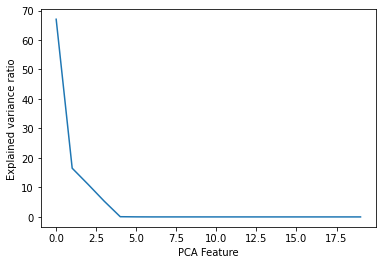

In [21]:
plt.plot(range(components_ratio.size), components_ratio)
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance ratio')

Text(0, 0.5, 'Total explained variance ratio')

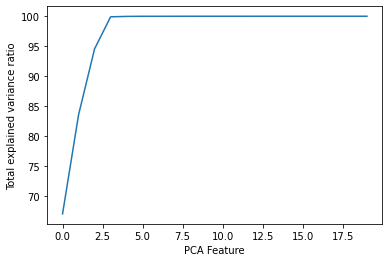

In [22]:
plt.plot(range(components_ratio.size), np.cumsum(components_ratio))
plt.xlabel('PCA Feature')
plt.ylabel('Total explained variance ratio')

## 4. Возьмите модель машинного обучения из любой предыдущей работы (главное, чтобы в ней было минимум несколько вещественных признаков), либо постройте новую. Сравните метрики качества исходной модели и другой модели, где вещественные признаки предварительно прошли через процедуру снижения размерности. Напишите выводы.

In [62]:
estimator = RandomForestClassifier()
scaler = StandardScaler()

In [63]:
features = df.drop(columns=['price_range'])
target = df.price_range
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.3, random_state=13)

### Scaler  $\rightarrow$  KNN

In [64]:
%%time
basic_pipe = make_pipeline(scaler, estimator)
basic_pipe.fit(X_train, y_train)
pred = basic_pipe.predict(X_test)
print(f"score on train: {basic_pipe.score(X_train, y_train)}")
print(f"score on test: {basic_pipe.score(X_test, y_test)}")

score on train: 1.0
score on test: 0.8616666666666667
Wall time: 569 ms


### Scaler   $\rightarrow$   PCA(2)   $\rightarrow$   KNN

In [65]:
%%time
pipe = make_pipeline(scaler, PCA(n_components=2), estimator)
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print(f"score on train: {pipe.score(X_train, y_train)}")
print(f"score on test: {pipe.score(X_test, y_test)}")

score on train: 0.745
score on test: 0.2683333333333333
Wall time: 669 ms


### Scaler   $\rightarrow$   PCA(4)   $\rightarrow$   KNN

In [66]:
%%time
pipe = make_pipeline(scaler, PCA(n_components=4), estimator)
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print(f"score on train: {pipe.score(X_train, y_train)}")
print(f"score on test: {pipe.score(X_test, y_test)}")

score on train: 0.9678571428571429
score on test: 0.2733333333333333
Wall time: 771 ms


### Scaler   $\rightarrow$   PCA(6)   $\rightarrow$   KNN

In [67]:
%%time
pipe = make_pipeline(scaler, PCA(n_components=6), estimator)
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print(f"score on train: {pipe.score(X_train, y_train)}")
print(f"score on test: {pipe.score(X_test, y_test)}")

score on train: 1.0
score on test: 0.37833333333333335
Wall time: 828 ms


### Scaler   $\rightarrow$   PCA(8)   $\rightarrow$   KNN

In [68]:
%%time
pipe = make_pipeline(scaler, PCA(n_components=8), estimator)
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print(f"score on train: {pipe.score(X_train, y_train)}")
print(f"score on test: {pipe.score(X_test, y_test)}")

score on train: 1.0
score on test: 0.41
Wall time: 722 ms


<AxesSubplot:>

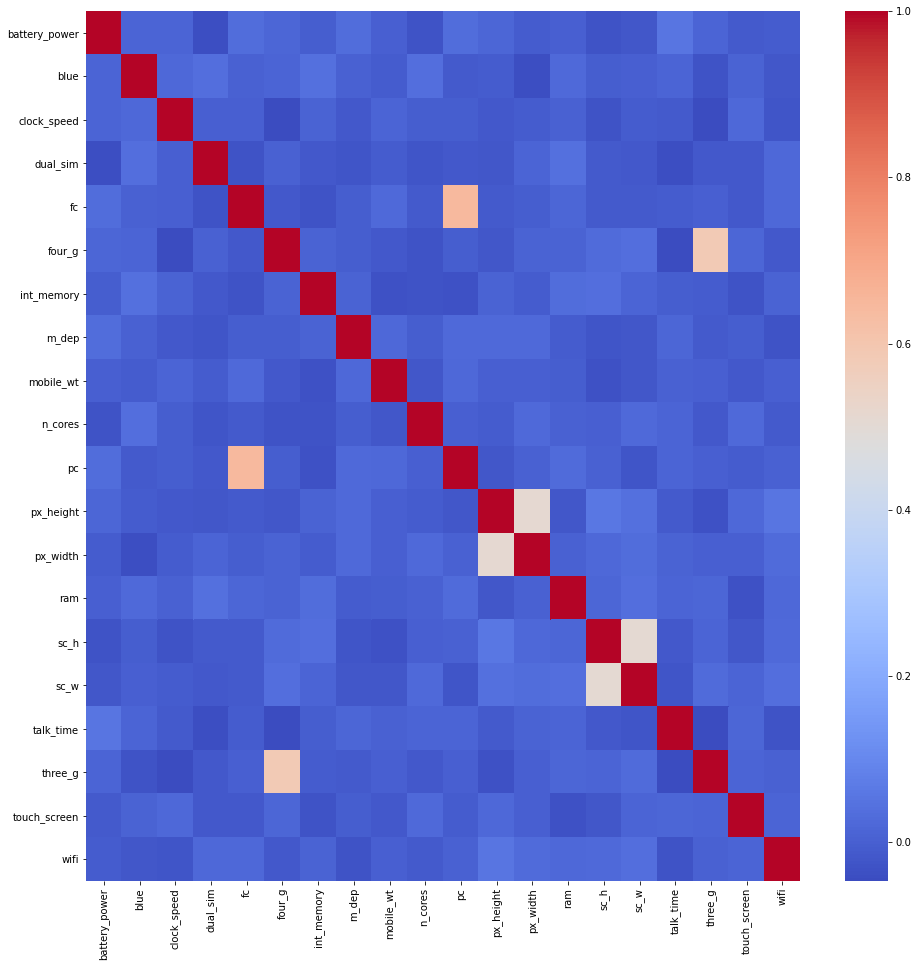

In [69]:
plt.figure(figsize=(16, 16))
sns.heatmap(temp.corr(), cmap= 'coolwarm')

**Результаты для меня оказались достаточно странными. Возможно был выбран неправильно набор данных (он не подходит для работы с методом главных компонент, либо я неправильно его обработал), однако был просмотрел весь Kaggle и прочие предложенные ресурсы и набора для классификация с 20 вещественными признаками найти так и не удалось.**